# Jasmine's Boba Tracker

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import calplot

In [2]:
boba_raw = pd.read_csv('boba.csv')

In [3]:
boba_raw

month  date     location  \
0    january     3          ume   
1    january     4     sunright   
2    january    14         luxe   
3    january    21          yun   
4    january    21          yun   
5    january    25        omomo   
6    january    26       tastea   
7    january    29        omomo   
8   february     1  camellia rd   
9   february     3          yun   
10  february     4        omomo   
11  february     7       tastea   
12  february    10          yun   
13  february    11          yun   
14  february    12      da boba   
15  february    18  camellia rd   
16  february    19     teaspoon   
17  february    20       tastea   
18  february    21          yun   
19  february    24          yun   
20  february    25        omomo   
21  february    26       tastea   

                                                drink  
0                     peach oolong milk tea with boba  
1                         original milk tea with boba  
2   strawberry milk tea with strawberry heart jell...  
3                          hojicha milk tea with boba  
4                    rooibos milk tea with boba (zzz)  
5   matcha smoothie with creme brûlée and boba (om...  
6   orange raspberry & passion fruit smoothie with...  
7         mango slush with mango bits (mango tornado)  
8                        earl grey milk tea with boba  
9   mango smoothie with cream and rice (mango stic...  
10  strawberry slush with strawberry bits (strawbe...  
11                      strawberry milk tea with boba  
12  da hong pao oolong milk tea with boba (emperor...  
13          jasmine milk tea with boba (snow jasmine)  
14                      classic milk tea with pudding  
15                       earl grey milk tea with boba  
16             banana milk with pudding and honeycomb  
17                         jasmine milk tea with boba  
18          jasmine milk tea with boba (snow jasmine)  
19  mango smoothie with cream and rice (mango stic...  
20    taro smoothie with mochi (taro taro with mochi)  
21  strawberry smoothie with strawberry bits (stra...

In [4]:
boba = boba_raw.copy()

In [5]:
def get_name(drink):
    pattern = r'\(([^)]*)\)'
    name = re.findall(pattern, drink)
    if len(name) > 0:
        return name[0].strip()
    else:
        return np.nan

def get_base(drink):
    base = drink.split(' with ')[0]
    return base.strip()
    
def get_toppings(drink):
    t = re.split(' with ', drink)
    if len(t) > 1:
        t = re.split(r' \(', t[1])[0]
        t = t.split(' and ')
        return t
    else:
        return np.nan
    
def get_category(drink):
    if 'milk tea' in drink:
        return 'milk tea'
    elif 'milk' in drink:
        return 'milk'
    elif 'tea' in drink:
        return 'tea'
    elif 'smoothie' in drink or 'slush' in drink:
        return 'blended'
    else:
        return 'other'

In [6]:
boba['name'] = boba['drink'].apply(get_name)
boba['base'] = boba['drink'].apply(get_base)
boba['toppings'] = boba['drink'].apply(get_toppings)
boba['type'] = boba['drink'].apply(get_category)

In [7]:
month_map = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12
}

boba['month_num'] = boba['month'].map(month_map)
boba['date'] = boba['date'].astype(int)
boba['date_obj'] = boba.apply(lambda row: datetime(year=2024, month=row['month_num'], day=row['date']), axis=1)
boba['weekday'] = boba['date_obj'].apply(lambda d: d.weekday() + 1)

In [8]:
boba

month  date     location  \
0    january     3          ume   
1    january     4     sunright   
2    january    14         luxe   
3    january    21          yun   
4    january    21          yun   
5    january    25        omomo   
6    january    26       tastea   
7    january    29        omomo   
8   february     1  camellia rd   
9   february     3          yun   
10  february     4        omomo   
11  february     7       tastea   
12  february    10          yun   
13  february    11          yun   
14  february    12      da boba   
15  february    18  camellia rd   
16  february    19     teaspoon   
17  february    20       tastea   
18  february    21          yun   
19  february    24          yun   
20  february    25        omomo   
21  february    26       tastea   

                                                drink                  name  \
0                     peach oolong milk tea with boba                   NaN   
1                         original milk tea with boba                   NaN   
2   strawberry milk tea with strawberry heart jell...          pink panther   
3                          hojicha milk tea with boba                   NaN   
4                    rooibos milk tea with boba (zzz)                   zzz   
5   matcha smoothie with creme brûlée and boba (om...          omomo matcha   
6   orange raspberry & passion fruit smoothie with...           yummy gummy   
7         mango slush with mango bits (mango tornado)         mango tornado   
8                        earl grey milk tea with boba                   NaN   
9   mango smoothie with cream and rice (mango stic...     mango sticky rice   
10  strawberry slush with strawberry bits (strawbe...    strawberry tornado   
11                      strawberry milk tea with boba                   NaN   
12  da hong pao oolong milk tea with boba (emperor...    emperor’s red robe   
13          jasmine milk tea with boba (snow jasmine)          snow jasmine   
14                      classic milk tea with pudding                   NaN   
15                       earl grey milk tea with boba                   NaN   
16             banana milk with pudding and honeycomb                   NaN   
17                         jasmine milk tea with boba                   NaN   
18          jasmine milk tea with boba (snow jasmine)          snow jasmine   
19  mango smoothie with cream and rice (mango stic...     mango sticky rice   
20    taro smoothie with mochi (taro taro with mochi)  taro taro with mochi   
21  strawberry smoothie with strawberry bits (stra...  strawberry sensation   

                                         base                  toppings  \
0                       peach oolong milk tea                    [boba]   
1                           original milk tea                    [boba]   
2                         strawberry milk tea  [strawberry heart jelly]   
3                            hojicha milk tea                    [boba]   
4                            rooibos milk tea                    [boba]   
5                             matcha smoothie      [creme brûlée, boba]   
6   orange raspberry & passion fruit smoothie              [peach bits]   
7                                 mango slush              [mango bits]   
8                          earl grey milk tea                    [boba]   
9                              mango smoothie             [cream, rice]   
10                           strawberry slush         [strawberry bits]   
11                        strawberry milk tea                    [boba]   
12                da hong pao oolong milk tea                    [boba]   
13                           jasmine milk tea                    [boba]   
14                           classic milk tea                 [pudding]   
15                         earl grey milk tea                    [boba]   
16                                banana milk      [pudding, honeycomb]   
17                           jasm

In [9]:
boba_clean = boba.drop(columns=['month', 'date', 'drink', 'month_num'])
boba_clean

location                  name  \
0           ume                   NaN   
1      sunright                   NaN   
2          luxe          pink panther   
3           yun                   NaN   
4           yun                   zzz   
5         omomo          omomo matcha   
6        tastea           yummy gummy   
7         omomo         mango tornado   
8   camellia rd                   NaN   
9           yun     mango sticky rice   
10        omomo    strawberry tornado   
11       tastea                   NaN   
12          yun    emperor’s red robe   
13          yun          snow jasmine   
14      da boba                   NaN   
15  camellia rd                   NaN   
16     teaspoon                   NaN   
17       tastea                   NaN   
18          yun          snow jasmine   
19          yun     mango sticky rice   
20        omomo  taro taro with mochi   
21       tastea  strawberry sensation   

                                         base                  toppings  \
0                       peach oolong milk tea                    [boba]   
1                           original milk tea                    [boba]   
2                         strawberry milk tea  [strawberry heart jelly]   
3                            hojicha milk tea                    [boba]   
4                            rooibos milk tea                    [boba]   
5                             matcha smoothie      [creme brûlée, boba]   
6   orange raspberry & passion fruit smoothie              [peach bits]   
7                                 mango slush              [mango bits]   
8                          earl grey milk tea                    [boba]   
9                              mango smoothie             [cream, rice]   
10                           strawberry slush         [strawberry bits]   
11                        strawberry milk tea                    [boba]   
12                da hong pao oolong milk tea                    [boba]   
13                           jasmine milk tea                    [boba]   
14                           classic milk tea                 [pudding]   
15                         earl grey milk tea                    [boba]   
16                                banana milk      [pudding, honeycomb]   
17                           jasmine milk tea                    [boba]   
18                           jasmine milk tea                    [boba]   
19                             mango smoothie             [cream, rice]   
20                              taro smoothie                   [mochi]   
21                        strawberry smoothie         [strawberry bits]   

        type   date_obj  weekday  
0   milk tea 2024-01-03        3  
1   milk tea 2024-01-04        4  
2   milk tea 2024-01-14        7  
3   milk tea 2024-01-21        7  
4   milk tea 2024-01-21        7  
5    blended 2024-01-25        4  
6    blended 2024-01-26        5  
7    blended 2024-01-29        1  
8   milk tea 2024-02-01        4  
9    blended 2024-02-03        6  
10   blended 2024-02-04        7  
11  milk tea 2024-02-07        3  
12  milk tea 2024-02-10        6  
13  milk tea 2024-02-11        7  
14  milk tea 2024-02-12        1  
15  milk tea 2024-02-18        7  
16      milk 2024-02-19        1  
17  milk tea 2024-02-20        2  
18  milk tea 2024-02-21        3  
19   blended 2024-02-24        6  
20   blended 2024-02-25        7  
21   blended 2024-02-26        1

### Locations

<AxesSubplot:xlabel='location'>

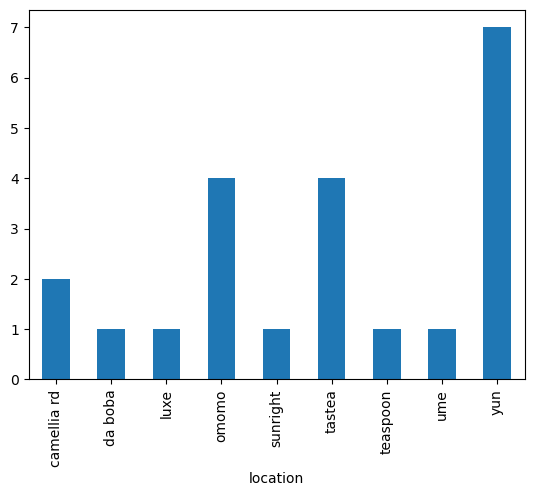

In [10]:
boba_clean.groupby('location').count()['base'].plot.bar()

### Weekdays

<AxesSubplot:xlabel='weekday'>

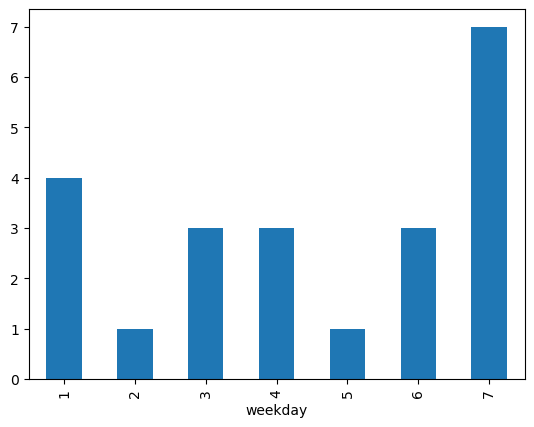

In [10]:
boba_clean.groupby('weekday').count()['base'].plot.bar()

(<Figure size 1250x170 with 2 Axes>,
 array([<AxesSubplot:ylabel='2024'>], dtype=object))

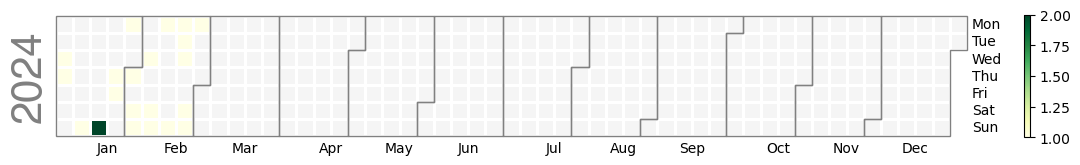

In [11]:
calplot.calplot(boba_clean.groupby('date_obj').count()['base'], cmap='YlGn')

### Unique Drinks

In [12]:
boba_clean.groupby('base')['type'].count().sort_values(ascending=False)

base
jasmine milk tea                             3
earl grey milk tea                           2
strawberry milk tea                          2
mango smoothie                               2
banana milk                                  1
original milk tea                            1
strawberry smoothie                          1
strawberry slush                             1
rooibos milk tea                             1
peach oolong milk tea                        1
matcha smoothie                              1
orange raspberry & passion fruit smoothie    1
classic milk tea                             1
mango slush                                  1
hojicha milk tea                             1
da hong pao oolong milk tea                  1
taro smoothie                                1
Name: type, dtype: int64